In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
#exercise 3-1

In [3]:
resp = nsfg.ReadFemResp()

In [4]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [5]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

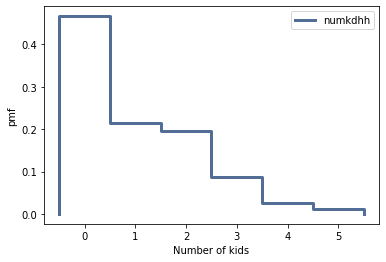

In [6]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of kids', ylabel='pmf')

In [7]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

#copied from pg32

In [8]:
biased = BiasPmf(pmf, label='Biased')

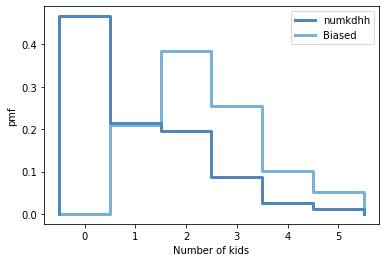

In [9]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of kids', ylabel='pmf')

In [10]:
pmf.Mean()

1.024205155043831

In [11]:
biased.Mean()

2.403679100664282

In [12]:
#exercise 3-2

In [13]:
def PmfMean(listOfSamples, pmf):
    uniqueSamples = []
    pmfMean = 0
    for x in listOfSamples:
        if x not in uniqueSamples:
            uniqueSamples.add(x)
    for y in uniqueSamples:
        pmf = thinkplot.Pmf(y)
        pmfMean += pmf * y
    return pmfMean

In [14]:
def PmfVar(listOfSamples, pmf, pmfMean):
    uniqueSamples = []
    pmfVar = 0
    for x in listOfSamples:
        if x not in uniqueSamples:
            uniqueSamples.add(x)
    for y in uniqueSamples:
        pmf = thinkplot.Pmf(y)
        pmfVar += pmf * (y - pmfMean)**2       
    return pmfVar

In [15]:
#exercise 4-1

In [17]:
live, firsts, others = first.MakeFrames()

In [18]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
first_cdf.PercentileRank(8.5)

85.90419436167774

In [19]:
#exercise 4-2

In [22]:
randNumber = np.random.random(1000)

In [23]:
pmf = thinkstats2.Cdf(randNumber)

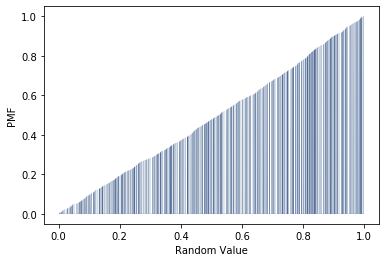

In [25]:
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random Value', ylabel='PMF')

In [27]:
cdf = thinkstats2.Cdf(randNumber)

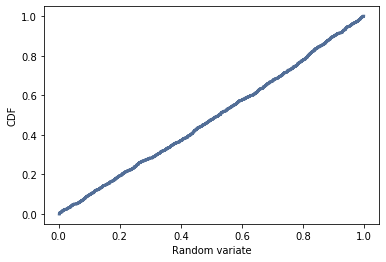

In [28]:
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')